In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset

merge_df = pd.merge(mouse_drug_data, clinical_trial, on="Mouse ID")
merge_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_volume = merge_df[{"Drug":"Drug","Timepoint":"Timepoint", "Tumor Volume (mm3)":"Tumor Volume (mm3)"}]
tumor_volume_df=pd.DataFrame(tumor_volume)
tumor_volume_df
organized=merge_df[["Drug","Timepoint","Tumor Volume (mm3)"]]
organized.head()

# # Convert to DataFrame

mean_grouped = organized.groupby(["Drug", "Timepoint"])
mean_tumor_volume=pd.DataFrame(mean_grouped["Tumor Volume (mm3)"].mean())


# # Preview DataFrame

mean_tumor_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem= merge_df.groupby(["Drug", "Timepoint"]).sem()
tumor_volume_sem=pd.DataFrame(tumor_volume_sem)

organized_tumor_sem=pd. DataFrame(tumor_volume_sem["Tumor Volume (mm3)"])
organized_tumor_sem.head()

# Convert to DataFrame

# tumor_volume_df=pd.DataFrame(organized_tumor_sem["Tumor Volume (mm3)"].sem())
# tumor_volume_df.head()

# Preview DataFrame



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
re_format=pd.pivot_table(mean_tumor_volume, values="Tumor Volume (mm3)", index="Timepoint", columns="Drug")
# Preview that Reformatting worked
re_format.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


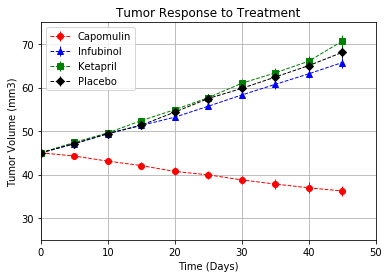

In [5]:
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure

error = organized_tumor_sem["Tumor Volume (mm3)"]["Capomulin"]
capomulin = plt.errorbar(x_axis, re_format["Capomulin"], yerr=error, fmt="o", linewidth=1, ls = "dashed", alpha=1, color ="red")

error = organized_tumor_sem["Tumor Volume (mm3)"]["Infubinol"]
infubinol = plt.errorbar(x_axis, re_format["Infubinol"], yerr=error, fmt="^", linewidth=1, ls = "dashed", alpha=1, color ="blue")

error = organized_tumor_sem["Tumor Volume (mm3)"]["Ketapril"]
ketapril = plt.errorbar(x_axis, re_format["Ketapril"], yerr=error, fmt="s", linewidth=1, ls = "dashed", alpha=1, color = "green")

error = organized_tumor_sem["Tumor Volume (mm3)"]["Placebo"]
placebo = plt.errorbar(x_axis, re_format["Placebo"], yerr=error, fmt="D", linewidth=1,ls = "dashed", alpha=1, color = "black")

plt.ylim(25, 75)
plt.xlim(0, 50)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.grid(linestyle="solid")
plt.legend((capomulin, infubinol, ketapril, placebo), ("Capomulin", "Infubinol", "Ketapril", "Placebo"))
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

Metastatic_Sites = merge_df[{"Drug":"Drug","Timepoint":"Timepoint", "Metastatic Sites":"Metastatic Sites"}]
Metastatic_Sites_df=pd.DataFrame(Metastatic_Sites)
organized_met=merge_df[["Drug","Timepoint","Metastatic Sites"]]

# Convert to DataFrame
mean_grouped_met = organized_met.groupby(["Drug", "Timepoint"])
mean_Metastatic_Sites=pd.DataFrame(mean_grouped_met["Metastatic Sites"].mean())


# Preview DataFrame

mean_Metastatic_Sites.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sites_sem= merge_df.groupby(["Drug", "Timepoint"]).sem()
metastatic_sites_sem=pd.DataFrame(metastatic_sites_sem)


organized_met_sem=pd. DataFrame(metastatic_sites_sem["Metastatic Sites"])
organized_met_sem.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
re_format_met=pd.pivot_table(mean_Metastatic_Sites, values="Metastatic Sites", index="Timepoint", columns="Drug")
# Preview that Reformatting worked
re_format_met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


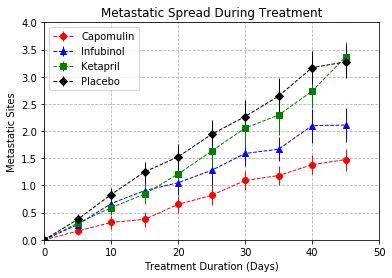

In [9]:
error2 = organized_met_sem["Metastatic Sites"]["Capomulin"]
capomulin2 = plt.errorbar(x_axis, re_format_met["Capomulin"], yerr=error2, fmt="o", linewidth=1, ls = "dashed", alpha=1, color ="red")

error2 = organized_met_sem["Metastatic Sites"]["Infubinol"]
infubinol2 = plt.errorbar(x_axis, re_format_met["Infubinol"], yerr=error2, fmt="^", linewidth=1, ls = "dashed", alpha=1, color ="blue")

error2 = organized_met_sem["Metastatic Sites"]["Ketapril"]
ketapril2 = plt.errorbar(x_axis, re_format_met["Ketapril"], yerr=error2, fmt="s", linewidth=1, ls = "dashed", alpha=1, color = "green")

error2 = organized_met_sem["Metastatic Sites"]["Placebo"]
placebo2 = plt.errorbar(x_axis, re_format_met["Placebo"], yerr=error2, fmt="D", linewidth=1,ls = "dashed", alpha=1, color = "black")

plt.ylim(0, 4)
plt.xlim(0, 50)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")

plt.grid(linestyle="dashed")
plt.legend((capomulin2, infubinol2, ketapril2, placebo2), ("Capomulin", "Infubinol", "Ketapril", "Placebo"))
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

count_mice = merge_df.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()
mice = count_mice.to_frame()

# Rename column
mice = mice.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame

mice.head()



Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [11]:
# Minor Data Munging to Re-Format the Data Frames
mice_re_format=pd.pivot_table(mice, values="Mouse Count", index="Timepoint", columns="Drug")
# Preview that Reformatting worked
mice_re_format

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


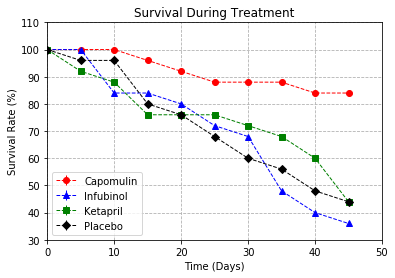

In [12]:
# Generate the Plot (Accounting for percentages)

capomulin3 = plt.errorbar(x_axis, (mice_re_format["Capomulin"]/25*100), yerr=error2, fmt="o", linewidth=1, ls = "dashed", alpha=1, color ="red")

infubinol3 = plt.errorbar(x_axis, (mice_re_format["Infubinol"]/25*100), yerr=error2, fmt="^", linewidth=1, ls = "dashed", alpha=1, color ="blue")

ketapril3 = plt.errorbar(x_axis, (mice_re_format["Ketapril"]/25*100), yerr=error2, fmt="s", linewidth=1, ls = "dashed", alpha=1, color = "green")

placebo3 = plt.errorbar(x_axis, (mice_re_format["Placebo"]/25*100), yerr=error2, fmt="D", linewidth=1,ls = "dashed", alpha=1, color = "black")

plt.ylim(30, 110)
plt.xlim(0, 50)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

plt.grid(linestyle="dashed")
plt.legend((capomulin3, infubinol3, ketapril3, placebo3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"))
plt.show()
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [13]:
met_change = re_format[["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane","Stelasyn","Zoniferol"]]

all_percent_change = (met_change.iloc[9,:] - met_change.iloc[0,:])/met_change.iloc[0,:]*100
all_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

TypeError: '>' not supported between instances of 'tuple' and 'int'

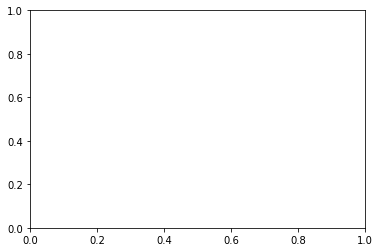

In [18]:
# Store all Relevant Percent Changes into a Tuple

percent_changes=(-19.475303, 46.123472, 51.297960, 57.028795)
percent_changes

# Splice the data between passing and failing 
x_axis = np.arange(len(percent_changes))


negative_data = [-19.475303]
positive_data = [46.123472, 51.297960, 57.028795]


fig, ax = plt.subplots()
percents= ax.bar(x_axis, percent_changes, color=(percent_changes > 0).map({True: 'g',False: 'r'}),  alpha=0.75, align="center")

            
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin','Infubinol', 'Ketapril','Placebo'])


# define the function

def autolabel(bars):
    for x in bars:
        height = x.get_height()
        if height > 0:ax.text(x.get_x() + x.get_width()/2., 0.2*height,'%d' % int(height), ha='center', va='bottom')
        else:
            ax.text(x.get_x() + x.get_width()/2., 0.3*height,'%d' % int(height), ha='center', va='bottom')
autolabel(percents)
# Use functions to label the percentages of changes

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-.5, len(x_axis)-.25)
plt.ylim(-25,60)
plt.grid()

plt.show()

# Save the Figure
plt.savefig("TumorChange.png")


# Show the Figure
# fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
# Include 3 observations about the results of the study. 
# Use the visualizations you generated from the study data as the basis for your observations.
    # 1) Out of the 3 drugs, and the placebo, Capomulin had the greatest survival rate.
    # 2) The mice that were administered Capomulin had a slower metastatic growth rate.
    # 3) Capamulin was the only drug in which the tumor volume of the mice decreased.
    # Conclusion: Capamulin successfully reduced tumor volume in mice, 
    #  and slowed metastaic growth over the 45 day trial period compared to the placebo, Infubinol 
    # and Ketrapril, which had the opposite affect on the mice.